In [0]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
from sklearn.utils import shuffle

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy

import timeit

Using TensorFlow backend.


In [0]:
data = pd.read_csv('D:/Study/NEU/Neural Network and AI/final/songs.csv')
data = data.drop(['filename'],axis = 1)
data = shuffle(data)

In [0]:
data.columns

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'rolloff', 'zero_crossing_rate', 'flatness', 'poly', 'chroma_cqt',
       'chroma_cens', 'spectral_contrast', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20', 'tonnetz1', 'tonnetz2', 'tonnetz3', 'tonnetz4',
       'tonnetz5', 'tonnetz6', 'label'],
      dtype='object')

In [0]:
data['label'].unique()

array(['rock', 'reggae', 'classical', 'metal', 'disco', 'pop', 'country',
       'hiphop', 'blues', 'jazz'], dtype=object)

In [0]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [0]:
results = []
names = []
seed = 7

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

LR: 0.687778 (0.043162)


D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\Study\Anacond

LDA: 0.691111 (0.028458)
KNN: 0.588889 (0.042745)
CART: 0.468889 (0.040307)
NB: 0.514444 (0.045826)


D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureW

SVM: 0.684444 (0.053794)


D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\svm\base.py:196: FutureW

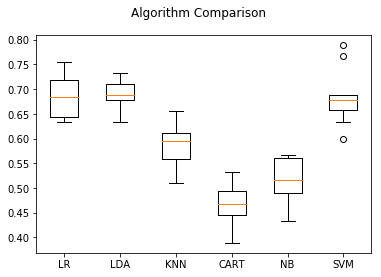

In [0]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# trying ensemble model

In [0]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []

In [0]:
num_folds = 10
scoring = 'accuracy'

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.186667 (0.023201)
GBM: 0.650000 (0.038889)


D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\ensemble\forest.py:2

RF: 0.561111 (0.046415)
ET: 0.565556 (0.041111)


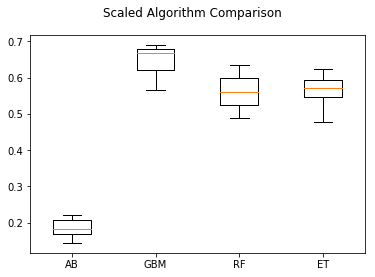

In [0]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# LSTM model

In [0]:
x_train = X_train.reshape((900, 1, 37))
ytrain = Y_train.reshape((900, 1, ))

In [0]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    
    #prevent overfitting: https://stats.stackexchange.com/questions/204745/preventing-overfitting-of-lstm-on-small-dataset
#https://www.researchgate.net/post/In_neural_networks_model_which_number_of_hidden_units_to_select
#https://pdfs.semanticscholar.org/064f/1e85984b207c1eb3c53ac8b68037089b7a0b.pdf

    model = Sequential()
    model.add(LSTM(units=36, return_sequences=True,input_shape=(1,37),activation='tanh',recurrent_activation='hard_sigmoid',use_bias=True))
    model.add(LSTM(units=16, dropout=0.2, recurrent_dropout=0.1, return_sequences=False, activation='tanh'))
    model.add(layers.Dense(32, activation='relu'))
#model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.1, return_sequences=False, activation='relu'))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(13, activation='relu'))

#model.add(Dense(16, activation='sigmoid'))
    model.add(layers.Dense(units = 10, activation='softmax'))
    model.compile(optimizer='RMSProp', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

In [0]:
start = timeit.default_timer()

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = data
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [30,50, 100]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

stop = timeit.default_timer()
print('Time: ', stop - start)

D:\Study\Anaconda\envs\AI\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.644444 using {'batch_size': 20, 'epochs': 100, 'init': 'normal', 'optimizer': 'adam'}
0.611111 (0.021999) with: {'batch_size': 5, 'epochs': 30, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.610000 (0.019626) with: {'batch_size': 5, 'epochs': 30, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.612222 (0.023147) with: {'batch_size': 5, 'epochs': 30, 'init': 'normal', 'optimizer': 'rmsprop'}
0.614444 (0.049015) with: {'batch_size': 5, 'epochs': 30, 'init': 'normal', 'optimizer': 'adam'}
0.614444 (0.034462) with: {'batch_size': 5, 'epochs': 30, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.605556 (0.023465) with: {'batch_size': 5, 'epochs': 30, 'init': 'uniform', 'optimizer': 'adam'}
0.620000 (0.035382) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.611111 (0.027397) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.621111 (0.017498) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimiz

In [0]:
x_test = X_test.reshape((100,1,37))
ytest = Y_test.reshape((100,1))

In [0]:
test_loss, test_acc = model.evaluate(x_test,ytest)
print('test_acc: ',test_acc)

AttributeError: 'KerasClassifier' object has no attribute 'evaluate'

In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

NameError: name 'history' is not defined

In [0]:
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

NameError: name 'history' is not defined

# keras classifier

In [0]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    return model

In [0]:
start = timeit.default_timer()
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = data
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [30,50, 100]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
stop = timeit.default_timer()
print('Time: ', stop - start)

Best: 0.684444 using {'batch_size': 20, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.675556 (0.047323) with: {'batch_size': 5, 'epochs': 30, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.652222 (0.042193) with: {'batch_size': 5, 'epochs': 30, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.654444 (0.036243) with: {'batch_size': 5, 'epochs': 30, 'init': 'normal', 'optimizer': 'rmsprop'}
0.662222 (0.035416) with: {'batch_size': 5, 'epochs': 30, 'init': 'normal', 'optimizer': 'adam'}
0.675556 (0.047945) with: {'batch_size': 5, 'epochs': 30, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.664444 (0.038522) with: {'batch_size': 5, 'epochs': 30, 'init': 'uniform', 'optimizer': 'adam'}
0.661111 (0.031309) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.656667 (0.036818) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.666667 (0.036818) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'opti

Another keras classifier

In [0]:
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, kernel_initializer=init, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [0]:
X_train.shape

(900, 37)

In [0]:
Y_train.shape

(900,)

In [0]:
start = timeit.default_timer()
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = data
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
stop = timeit.default_timer()
print('Time: ', stop - start)

Best: 0.133333 using {'batch_size': 5, 'epochs': 150, 'init': 'normal', 'optimizer': 'adam'}
0.111111 (0.008749) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.108889 (0.010999) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.110000 (0.014402) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.103333 (0.017847) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.107778 (0.013699) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.103333 (0.017847) with: {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.115556 (0.011331) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.110000 (0.009813) with: {'batch_size': 5, 'epochs': 100, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.125556 (0.021830) with: {'batch_size': 5, 'epochs': 100, 'init': 'normal', 'optim